In [31]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import StandardScaler  
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree, DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from pygam import LinearGAM, s



In [2]:
data = pd.read_excel('../dataproject2024.xlsx')
data.head()

ID  Job tenure  Age  Car price  Funding amount  Down payment  \
0   1          34   55       4875            3087             0   
1   2           5   29      13000           13000             0   
2   3          14   38      17190           14190             0   
3   4          16   37      22773           23568             0   
4   5           1   61       7700            8526             0   

   Loan duration  Monthly payment  Credit event  Married  Homeowner  \
0             36         0.047895             0        1          1   
1             60         0.091667             0        0          0   
2             60         0.088235             0        0          0   
3             48         0.110084             0        1          1   
4             48         0.123404             0        1          0   

   Default (y)  Pred_default (y_hat)        PD  Group  
0            0                     0  0.024480      1  
1            1                     0  0.331661      0  
2            0                     0  0.187505      0  
3            0                     0  0.035441      1  
4            1                     0  0.340883      0

In [3]:
data.drop(columns=['ID', 'Pred_default (y_hat)', 'Group', 'Default (y)'], inplace=True)


In [4]:
data

Job tenure  Age  Car price  Funding amount  Down payment  Loan duration  \
0             34   55       4875            3087             0             36   
1              5   29      13000           13000             0             60   
2             14   38      17190           14190             0             60   
3             16   37      22773           23568             0             48   
4              1   61       7700            8526             0             48   
...          ...  ...        ...             ...           ...            ...   
7425           9   38       4502            4856             0             48   
7426           1   33      22900           17900             0             60   
7427           3   27      25858           25972             0             24   
7428           6   32      12300           11300             0             72   
7429           5   47      15900           17764             0             96   

      Monthly payment  Credit event  Married  Homeowner        PD  
0            0.047895             0        1          1  0.024480  
1            0.091667             0        0          0  0.331661  
2            0.088235             0        0          0  0.187505  
3            0.110084             0        1          1  0.035441  
4            0.123404             0        1          0  0.340883  
...               ...           ...      ...        ...       ...  
7425         0.083846             1        0          0  0.217708  
7426         0.098000             0        0          0  0.063937  
7427         0.181667             0        0          0  0.630863  
7428         0.091963             0        0          1  0.067551  
7429         0.135000             0        1          0  0.150553  

[7430 rows x 11 columns]

In [5]:
continuous_features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Loan duration', 'Monthly payment']
scaler = StandardScaler()  
data[continuous_features] = scaler.fit_transform(data[continuous_features])

# Decision Tree Regressor as surrogate model

Training MAE: 0.13120519459174929, Testing MAE: 0.1335967881786074
Training RMSE: 0.17390020510703072, Testing RMSE: 0.17870505964210565


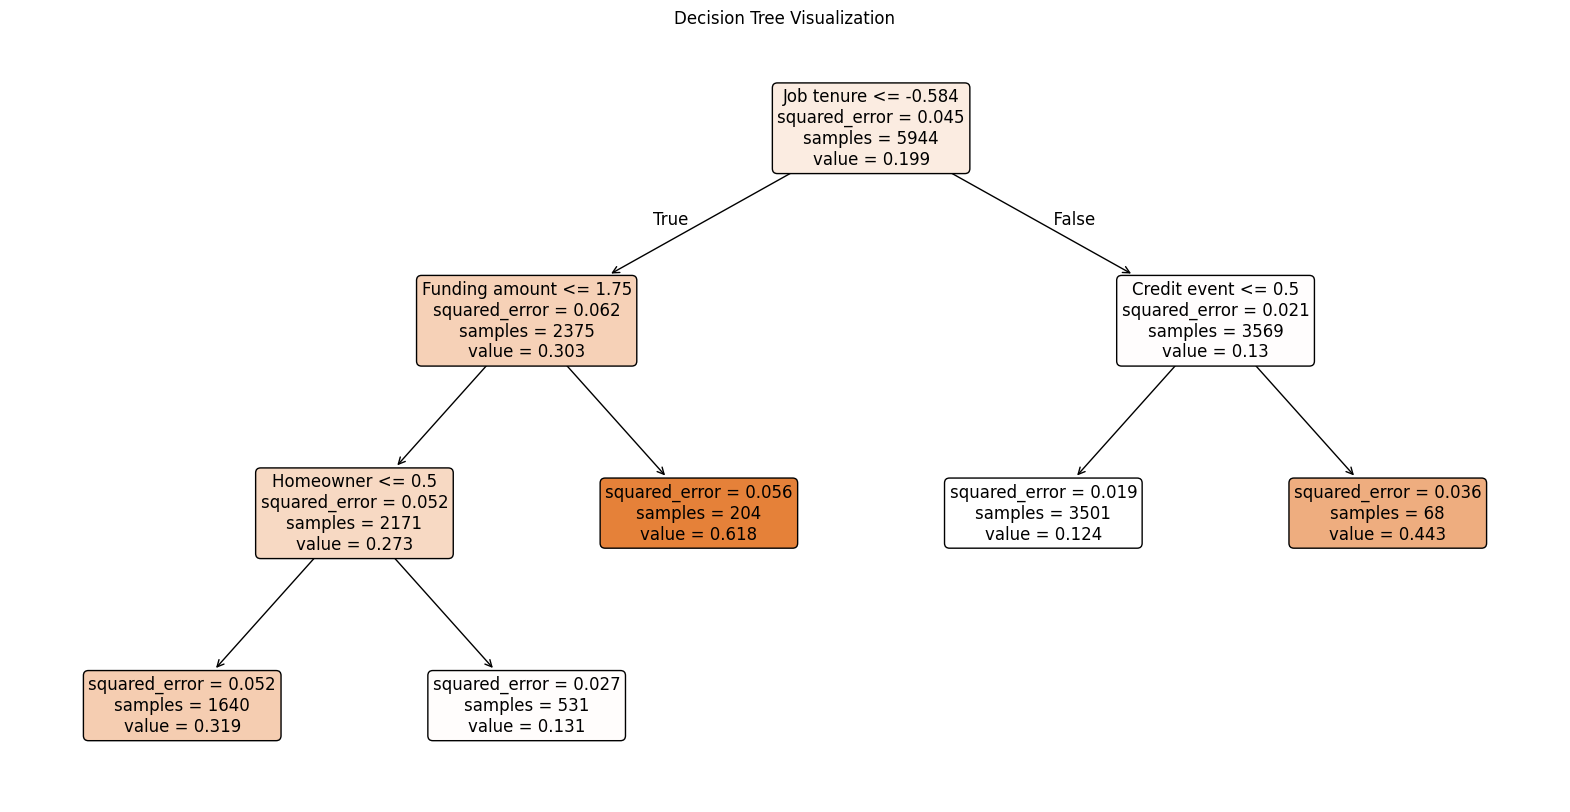

In [6]:


# Split features and target
X = data.drop(columns=['PD'])  # Features
y = data['PD']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = DecisionTreeRegressor(max_depth= 3, random_state = 42, ccp_alpha=0.001)
model.fit(X_train, y_train)


train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Calculate MAE and RMSE for training and testing sets
train_mae = mean_absolute_error(y_train, train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_mae = mean_absolute_error(y_test, test_predictions)



# Print results
print(f'Training MAE: {train_mae}, Testing MAE: {test_mae}')
print(f'Training RMSE: {train_rmse}, Testing RMSE: {test_rmse}')

plt.figure(figsize=(20, 10))  # Set the size of the plot
plot_tree(model, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()

## Blackbox model

In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler  
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import plot_tree, DecisionTreeRegressor, export_graphviz,DecisionTreeClassifier
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
import shap

In [3]:
data = pd.read_excel('/Users/malorenaudin/credit_scoring/dataproject2024.xlsx')
data.drop(columns=['ID', 'Pred_default (y_hat)', 'Group', 'PD'], inplace=True)
continuous_features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Loan duration', 'Monthly payment']
scaler = StandardScaler()  
data[continuous_features] = scaler.fit_transform(data[continuous_features])

In [4]:
X = data.drop(columns=['Default (y)'])  # Features
y = data['Default (y)']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = RandomForestClassifier( n_estimators=93, max_depth=14, min_samples_split=7, min_samples_leaf=6, random_state=42)
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]
y_train_pred_proba = model.predict_proba(X_train)[:, 1]
# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_auc = roc_auc_score(y_train, y_train_pred_proba)
test_auc = roc_auc_score(y_test, y_test_pred_proba)
print("train_accuracy", train_accuracy)
print("test_accuracy", test_accuracy)
print("train auc", train_auc)
print("test_auc", test_auc)

# Create a predictions DataFrame with test set predictions
predictions = X_test.copy()  # Start with test features
predictions['Predictions'] = test_predictions
predictions['Default (y)'] = y_test.values # Add predictions
predictions.index = X_test.index  # Keep the original index



train_accuracy 0.8534656796769852
test_accuracy 0.8257065948855989
train auc 0.9447665657372752
test_auc 0.7866038599548145


## Surrogate for black box model

Training Accuracy: 0.9663299663299664, Testing Accuracy: 0.959731543624161
Training AUC :0.8402065724880274, Testing AUC: 0.7421052631578947


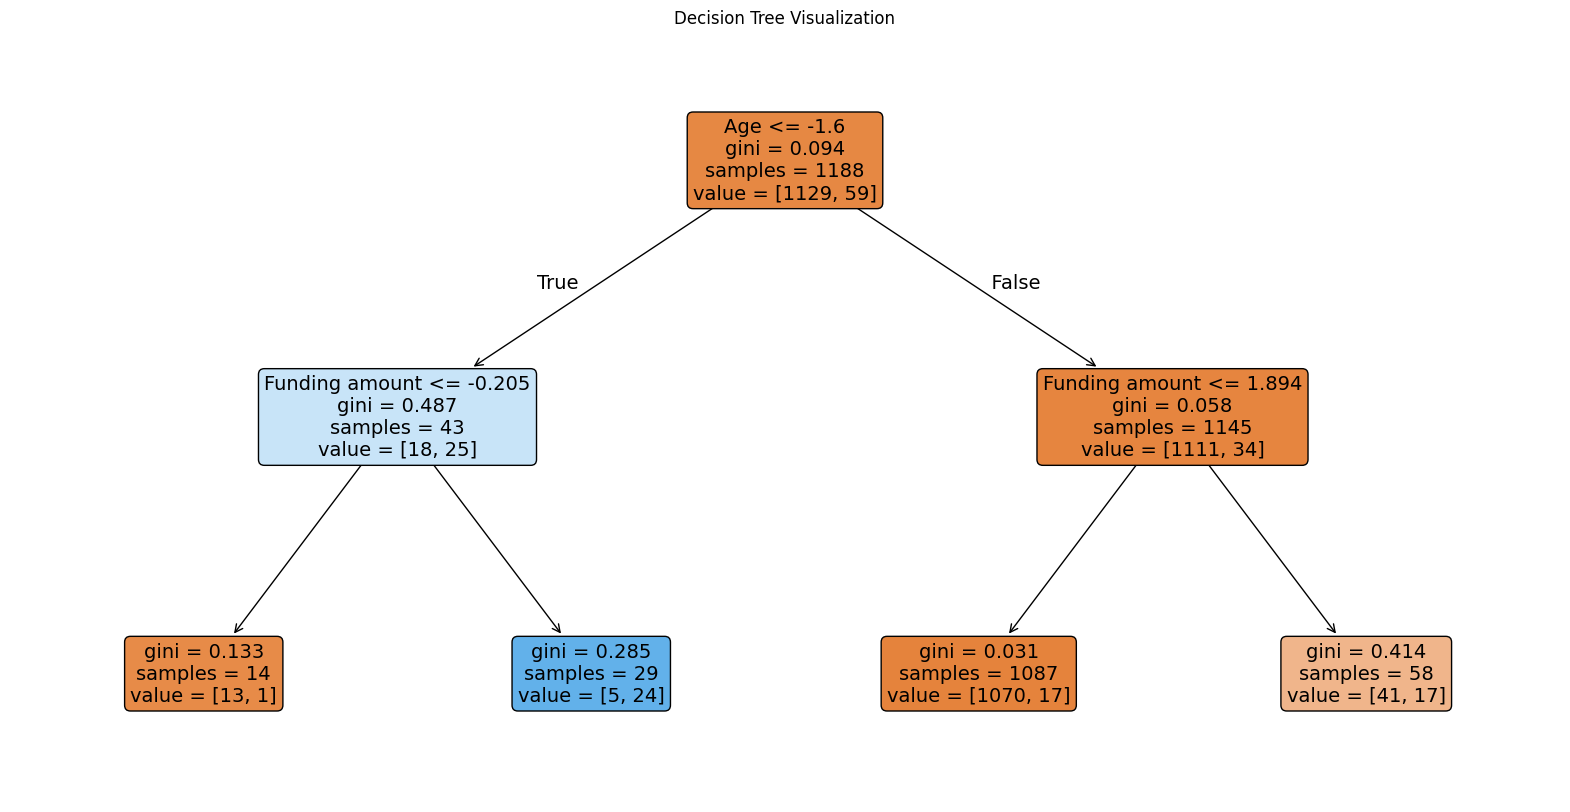

In [5]:
X = predictions.drop(columns=['Predictions', 'Default (y)'])  # Features
y = predictions['Predictions']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = DecisionTreeClassifier(max_depth = 2, random_state=42, ccp_alpha=0.001)
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
y_test_pred_proba = model.predict_proba(X_test)[:, 1]
y_train_pred_proba = model.predict_proba(X_train)[:, 1]
# Calculate accuracy and F1 score for training and testing sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_auc = roc_auc_score(y_train, y_train_pred_proba)
test_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print results
print(f'Training Accuracy: {train_accuracy}, Testing Accuracy: {test_accuracy}')
print(f'Training AUC :{train_auc}, Testing AUC: {test_auc}')



plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=14)
plt.title("Decision Tree Visualization")
plt.show()


# PDP for global interpretability of black box model

/var/folders/6m/4wjzvmz96lv4n94v4gkvf__00000gn/T/ipykernel_4661/2452865549.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


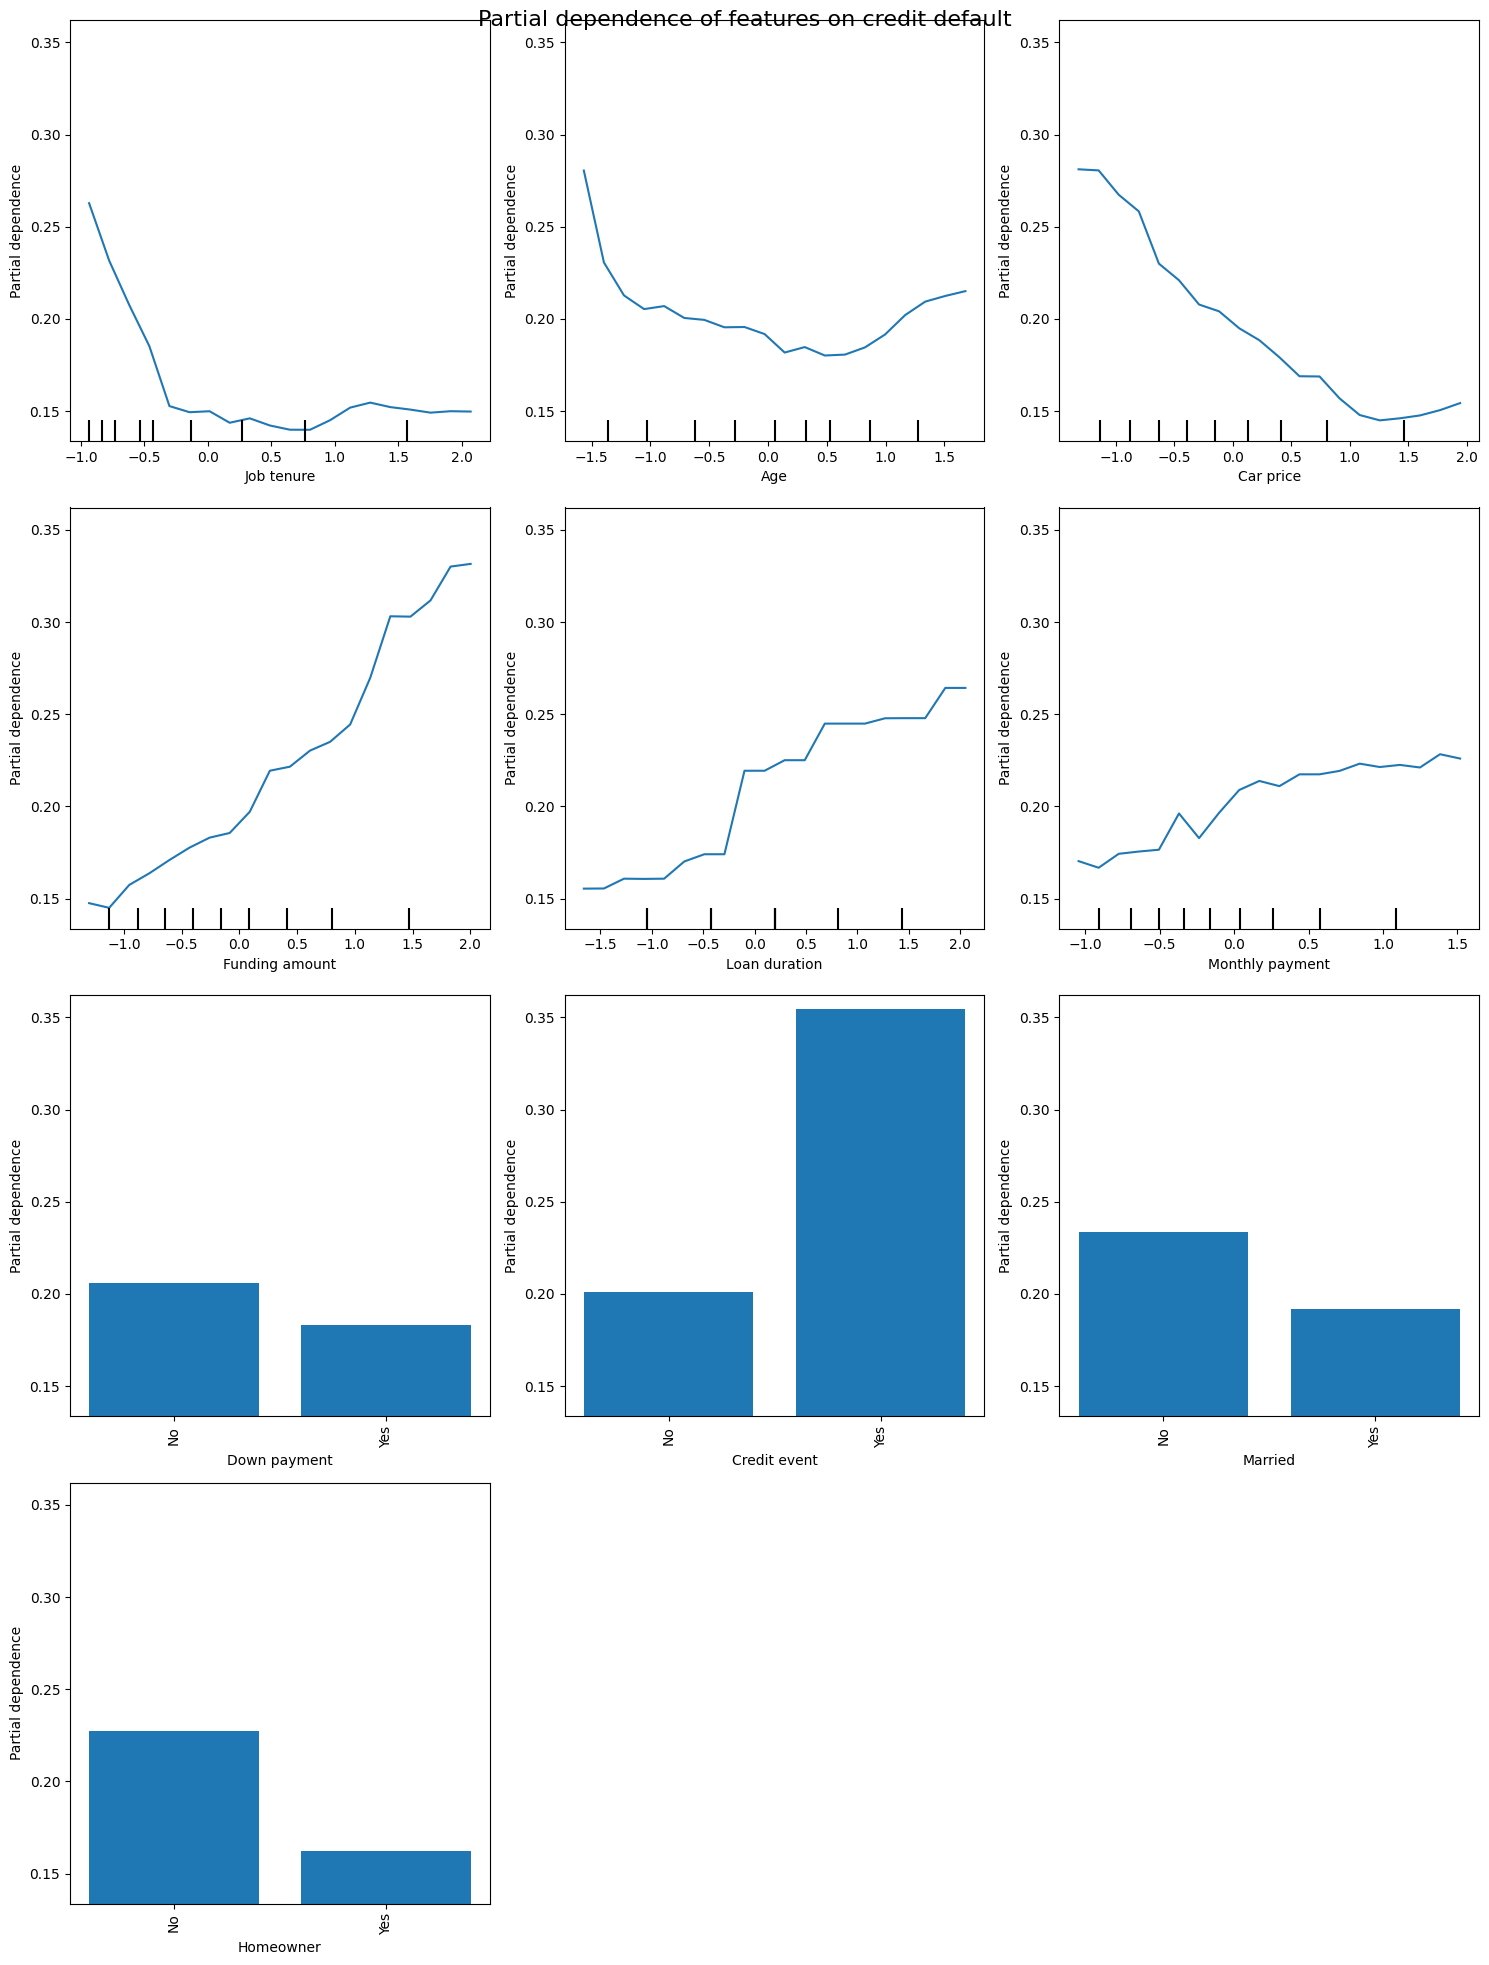

In [6]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

continuous_features = ['Job tenure', 'Age', 'Car price', 'Funding amount','Loan duration', 'Monthly payment' ]
categorical_features = ['Down payment', 'Credit event', 'Married', 'Homeowner']

# Assuming 'data' is your DataFrame
X = data.drop(columns=['Default (y)'])  # Features
y = data['Default (y)']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=93, max_depth=14, min_samples_split=7, min_samples_leaf=6, random_state=42)
model.fit(X_train, y_train)

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0, 
}
all_features = continuous_features + categorical_features

n_cols = 3
n_rows = (len(all_features) + n_cols - 1) // n_cols

fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, 5*n_rows), constrained_layout=True)

display = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=all_features,
    kind="average",
    categorical_features=categorical_features,
    ax=ax.ravel()[:len(all_features)],
    **common_params
)
for idx, feature in enumerate(all_features):
    if feature in categorical_features:
        ax_idx = idx % (n_cols * n_rows)
        current_ax = ax.ravel()[ax_idx]
        current_ax.set_xticks([0, 1])
        current_ax.set_xticklabels(['No', 'Yes'])

# Remove unused subplots
for i in range(len(all_features), n_rows * n_cols):
    fig.delaxes(ax.ravel()[i])

fig.suptitle("Partial dependence of features on credit default", fontsize=16)
plt.tight_layout()
plt.show()

# ICE for local interpretability of black box model

## Selecting the samples : True Positive (TP), False Positive (FP) (prediciton is 1, real value is 0), True Negative (TN), False Negative (FN)

In [6]:
predictions

Job tenure       Age  Car price  Funding amount  Down payment  \
625    -0.734566 -1.566605  -0.649982       -0.425264             0   
2796   -0.935008  0.664668  -0.408124       -0.342133             0   
101    -0.834787 -0.349547   0.493199        0.587267             0   
4767   -0.433904 -0.146704   1.139605        1.957759             0   
2018   -0.834787 -1.296148  -0.182390       -1.190398             1   
...          ...       ...        ...             ...           ...   
434     1.370071 -0.011475  -0.174328       -0.291590             0   
751     1.269850  1.002740  -0.393613        0.093305             0   
2183    1.269850 -0.281933  -0.795097       -0.574899             0   
1872   -0.534124  0.664668  -0.256076       -0.185349             0   
6412    0.267642  0.394211  -1.093872       -0.882981             0   

      Loan duration  Monthly payment  Credit event  Married  Homeowner  \
625        0.194999        -0.332407             0        0          0   
2796       0.814050        -0.347766             0        0          0   
101        0.194999         0.359944             0        1          0   
4767       0.814050         0.787769             0        0          0   
2018      -1.662157         0.169919             0        0          0   
...             ...              ...           ...      ...        ...   
434       -0.424053        -0.673458             0        1          1   
751        1.433102        -0.647013             0        1          0   
2183       0.814050        -1.238800             0        1          1   
1872      -1.043105         1.133924             0        1          0   
6412       0.194999        -0.949987             0        0          1   

      Predictions  Default (y)  
625             0            1  
2796            0            0  
101             0            1  
4767            0            0  
2018            0            0  
...           ...          ...  
434             0            0  
751             0            1  
2183            0            0  
1872            0            1  
6412            0            0  

[1486 rows x 12 columns]

In [7]:
# True Positive: Prediction = 1, Actual = 1
true_positive = predictions[(predictions['Predictions'] == 1) & (predictions['Default (y)'] == 1)].sample(1)

# True Negative: Prediction = 0, Actual = 0
true_negative = predictions[(predictions['Predictions'] == 0) & (predictions['Default (y)'] == 0)].sample(1)

# False Positive: Prediction = 1, Actual = 0
false_positive = predictions[(predictions['Predictions'] == 1) & (predictions['Default (y)'] == 0)].sample(1)

# False Negative: Prediction = 0, Actual = 1
false_negative = predictions[(predictions['Predictions'] == 0) & (predictions['Default (y)'] == 1)].sample(1)

# Display the samples
print("True Positive:\n", true_positive)
print("True Negative:\n", true_negative)
print("False Positive:\n", false_positive)
print("False Negative:\n", false_negative)


True Positive:
      Job tenure       Age  Car price  Funding amount  Down payment  \
401   -0.834787 -1.093305   2.908231        2.934378             0   

     Loan duration  Monthly payment  Credit event  Married  Homeowner  \
401        0.81405         1.636519             0        0          0   

     Predictions  Default (y)  
401            1            1  
True Negative:
       Job tenure       Age  Car price  Funding amount  Down payment  \
1876    2.171838  0.664668   2.107197        2.417804             0   

      Loan duration  Monthly payment  Credit event  Married  Homeowner  \
1876        0.81405         1.246167             0        1          1   

      Predictions  Default (y)  
1876            0            0  
False Positive:
       Job tenure       Age  Car price  Funding amount  Down payment  \
5812   -0.834787 -1.634219   1.460631        1.751097             0   

      Loan duration  Monthly payment  Credit event  Married  Homeowner  \
5812       0.194999     

True Positive
True Negative
False Positive
False Negative


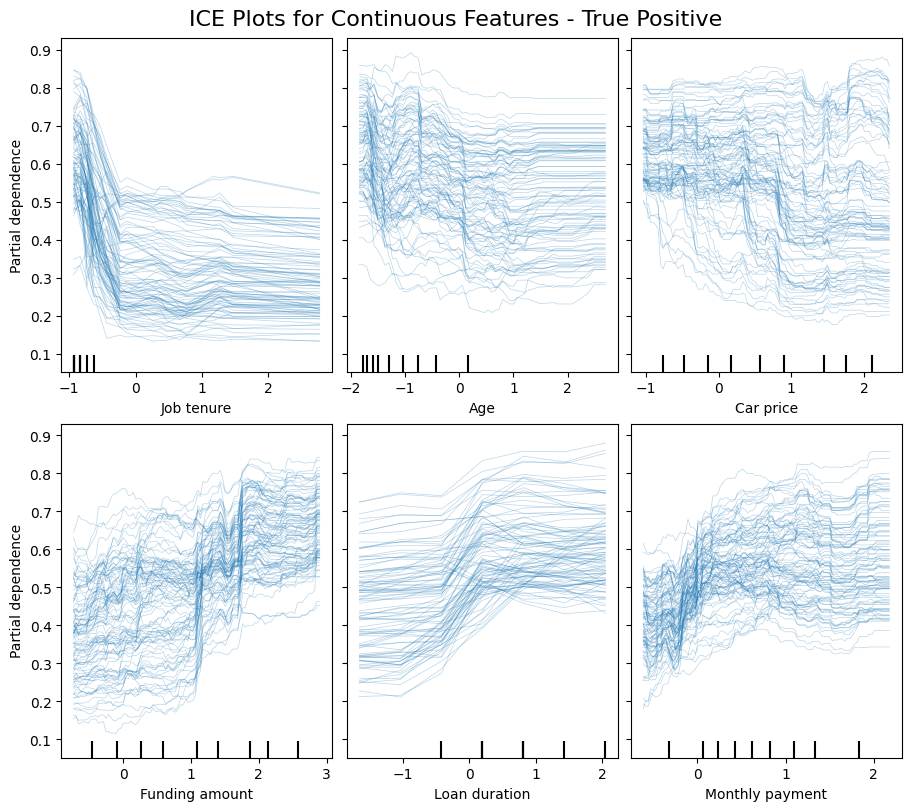

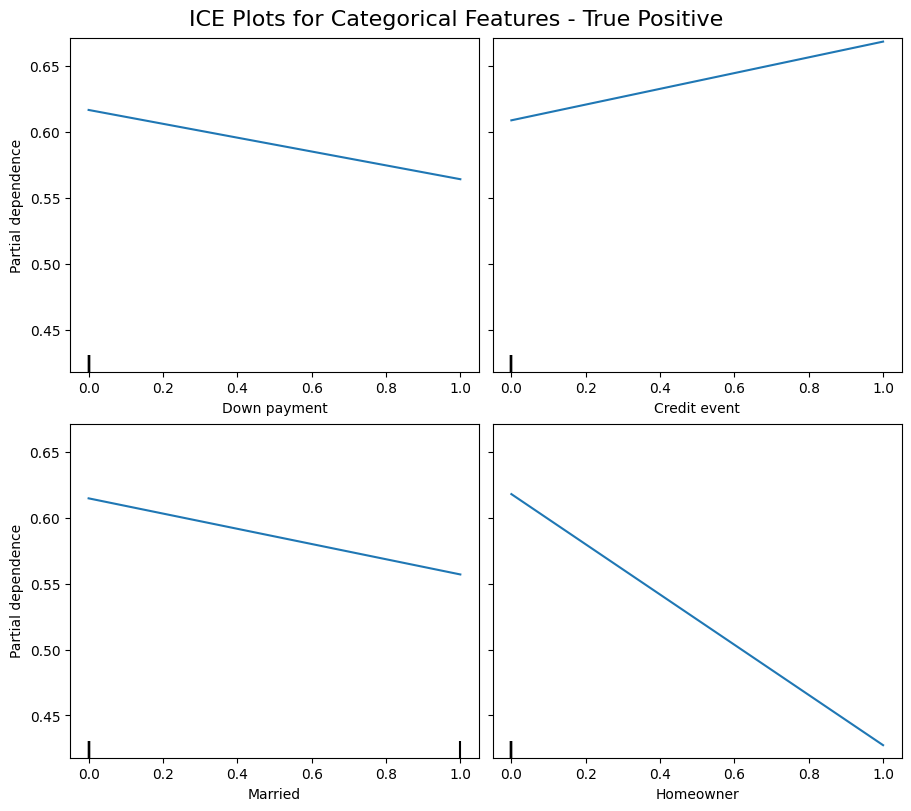

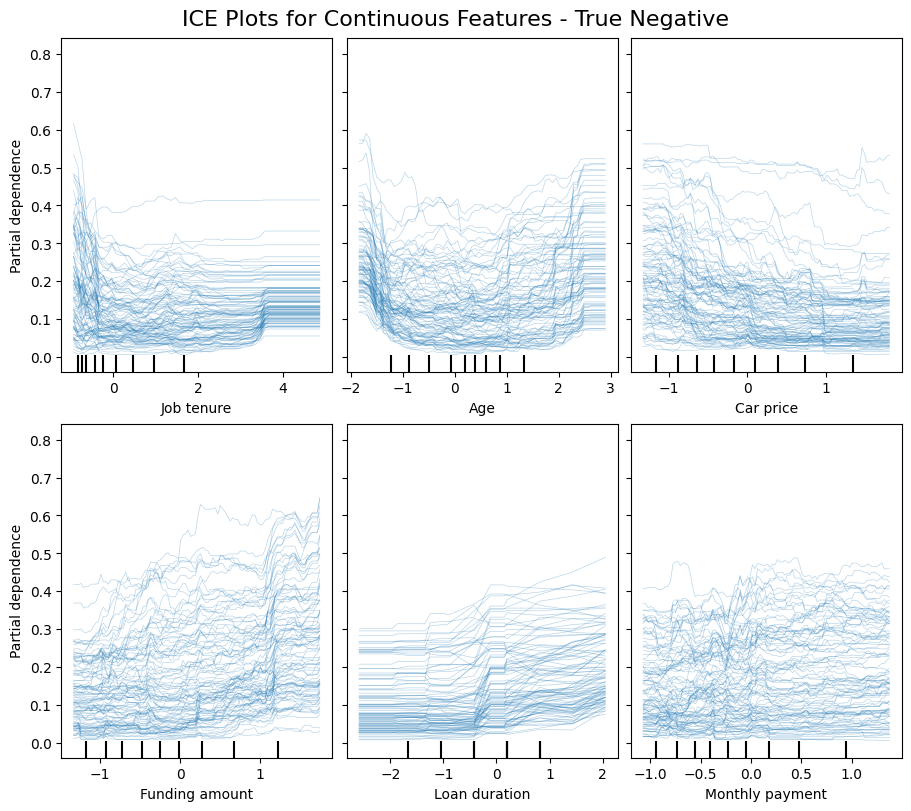

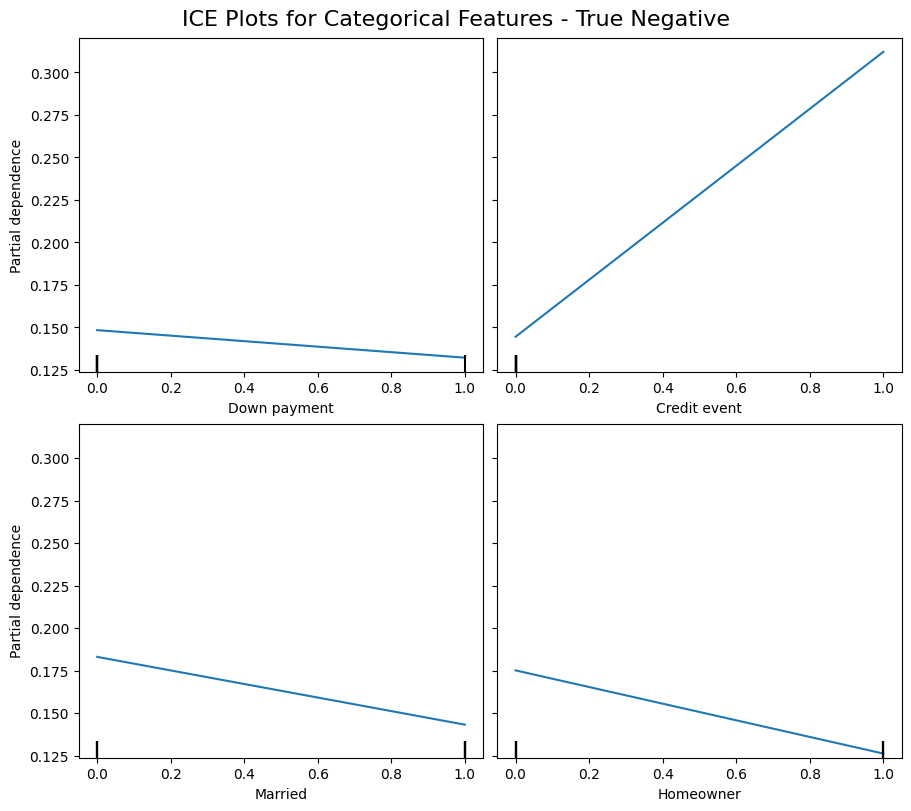

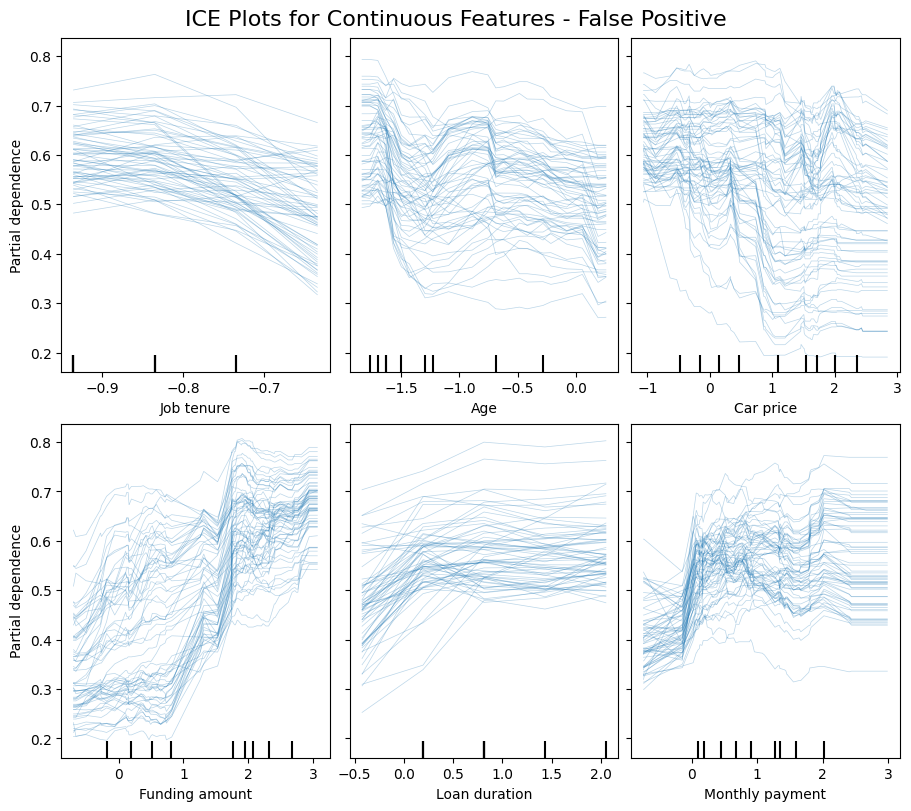

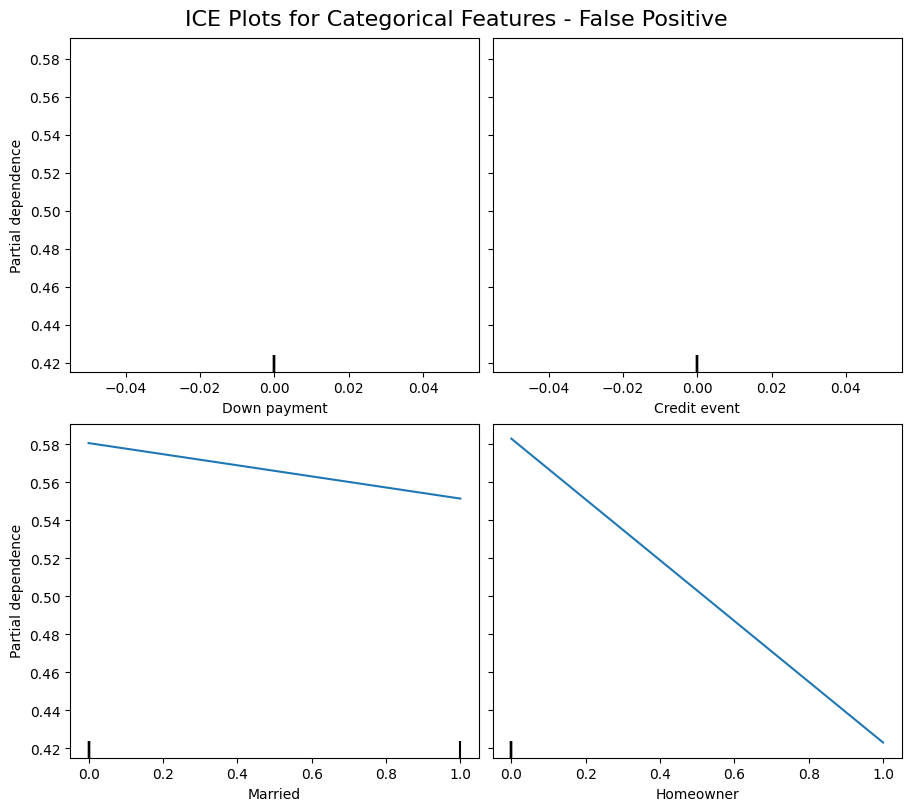

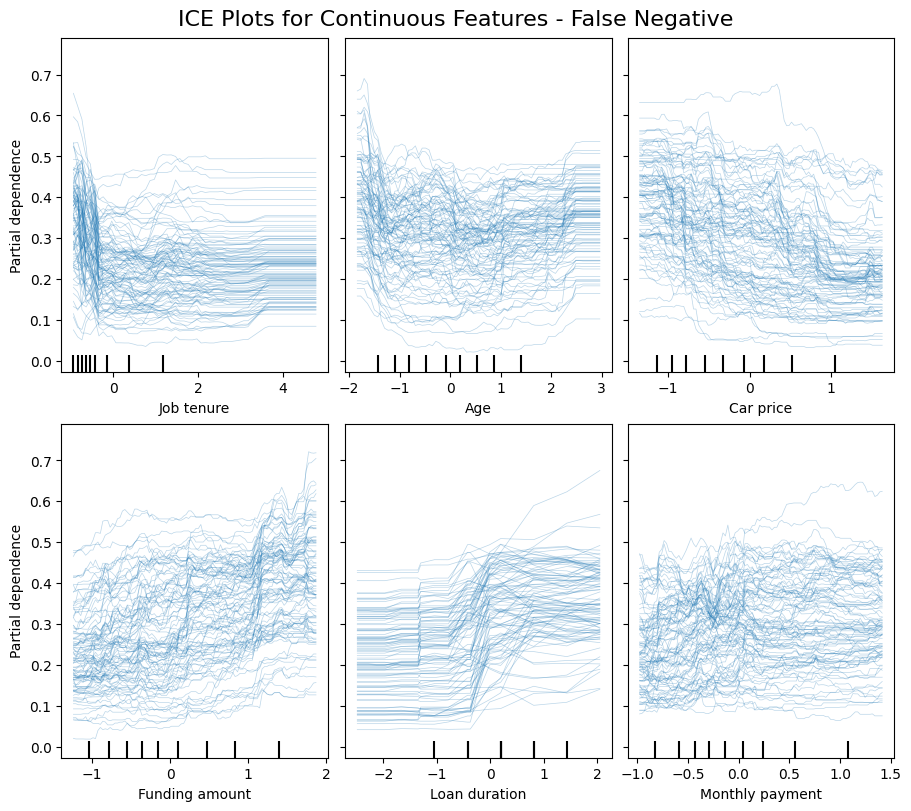

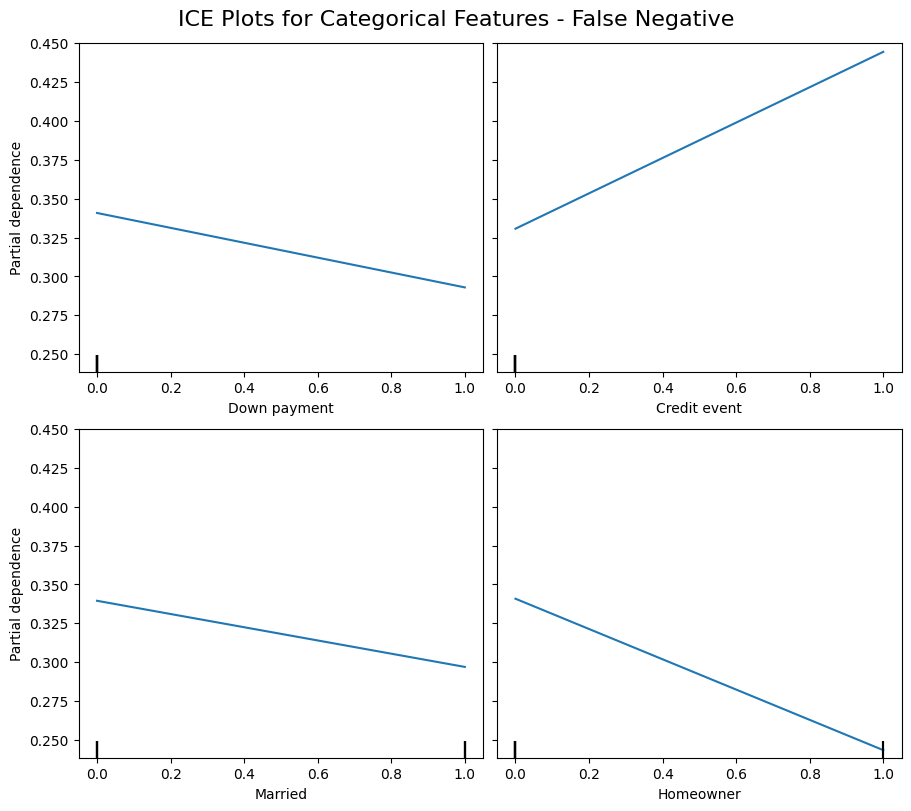

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

# Assuming 'data' is your DataFrame with features and target variable
X = data.drop(columns=['Default (y)'])  # Features
y = data['Default (y)']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=93, max_depth=14, min_samples_split=7, min_samples_leaf=6, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the entire dataset
predictions = model.predict(X)
predicted_probabilities = model.predict_proba(X)[:, 1]  # Probability of positive class

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'Predictions': predictions,
    'Predicted Probability': predicted_probabilities,
    'Default (y)': y
})

# Get indices for True Positive, True Negative, False Positive, False Negative
true_positive_indices = predictions_df[(predictions_df['Predictions'] == 1) & (predictions_df['Default (y)'] == 1)].index
true_negative_indices = predictions_df[(predictions_df['Predictions'] == 0) & (predictions_df['Default (y)'] == 0)].index
false_positive_indices = predictions_df[(predictions_df['Predictions'] == 1) & (predictions_df['Default (y)'] == 0)].index
false_negative_indices = predictions_df[(predictions_df['Predictions'] == 0) & (predictions_df['Default (y)'] == 1)].index

# Define subsets using indices to ensure we have all necessary columns without the target variable
subsets = {
    "True Positive": X.loc[true_positive_indices],
    "True Negative": X.loc[true_negative_indices],
    "False Positive": X.loc[false_positive_indices],
    "False Negative": X.loc[false_negative_indices]
}

# Define continuous and categorical features
continuous_features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Loan duration', 'Monthly payment']
categorical_features = ['Down payment', 'Credit event', 'Married', 'Homeowner']

common_params = {
    "subsample": 100,
    "n_jobs": -1,
}

for subset_name, subset_data in subsets.items():
    # ICE plots for continuous features using PartialDependenceDisplay
    print(subset_name)
    _, ax = plt.subplots(ncols=3, nrows=2, figsize=(9, 8), constrained_layout=True)

    display =PartialDependenceDisplay.from_estimator(
        model,
        subset_data,
        features=continuous_features,
        kind="individual",  # Set to "individual" for ICE plot
        **common_params,
        ax=ax
    )
    _ = display.figure_.suptitle(
    (
        f'ICE Plots for Continuous Features - {subset_name}'
    ),
    fontsize=16,
    )
    
    
    
    _, ax = plt.subplots(ncols=2, nrows=2, figsize=(9, 8), constrained_layout=True)

    
    display = PartialDependenceDisplay.from_estimator(
        model,
        subset_data,
        features=categorical_features,
        kind="average",  # Set to "average" for PDP plot
        **common_params,
        ax=ax
    )
    
    _ = display.figure_.suptitle(
    (
        f'ICE Plots for Categorical Features - {subset_name}'
    ),
    fontsize=16,
    )
    

# SHAP

SHAP Waterfall Plot - True Positive (Instance Index: 9)


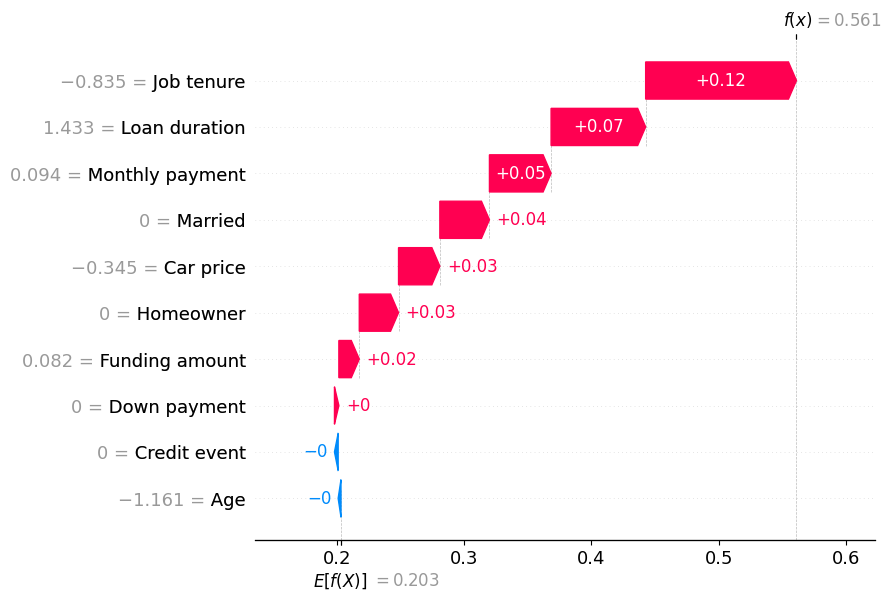

SHAP Waterfall Plot - True Negative (Instance Index: 0)


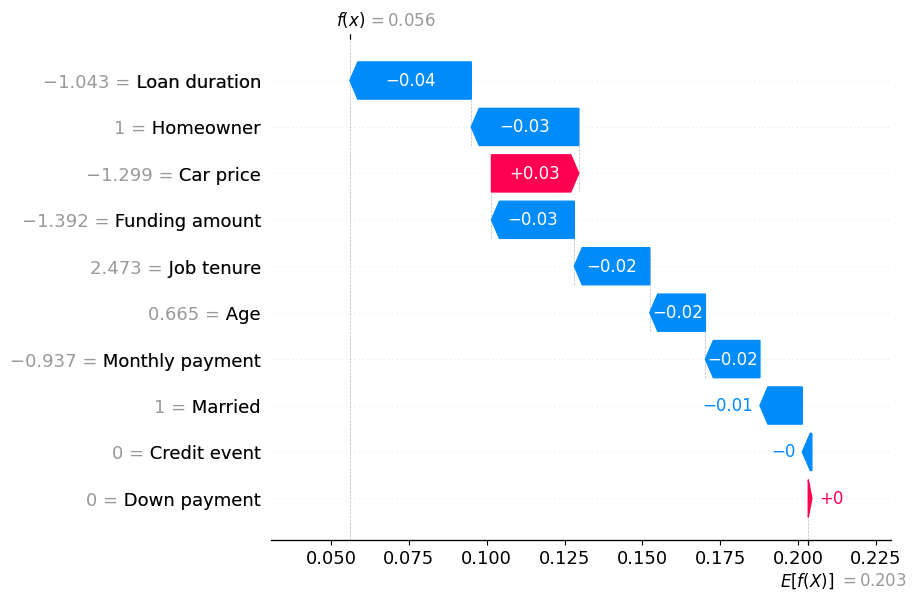

SHAP Waterfall Plot - False Positive (Instance Index: 195)


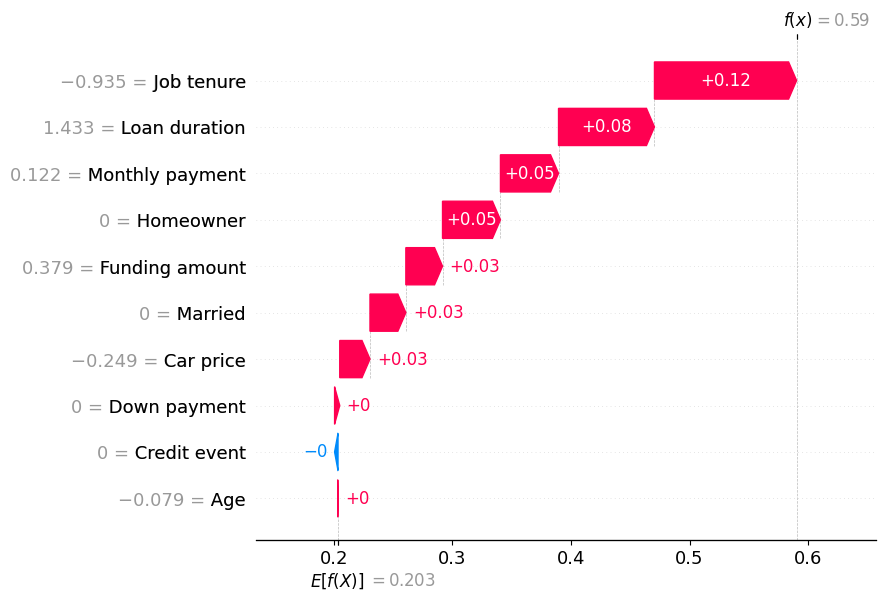

SHAP Waterfall Plot - False Negative (Instance Index: 1)


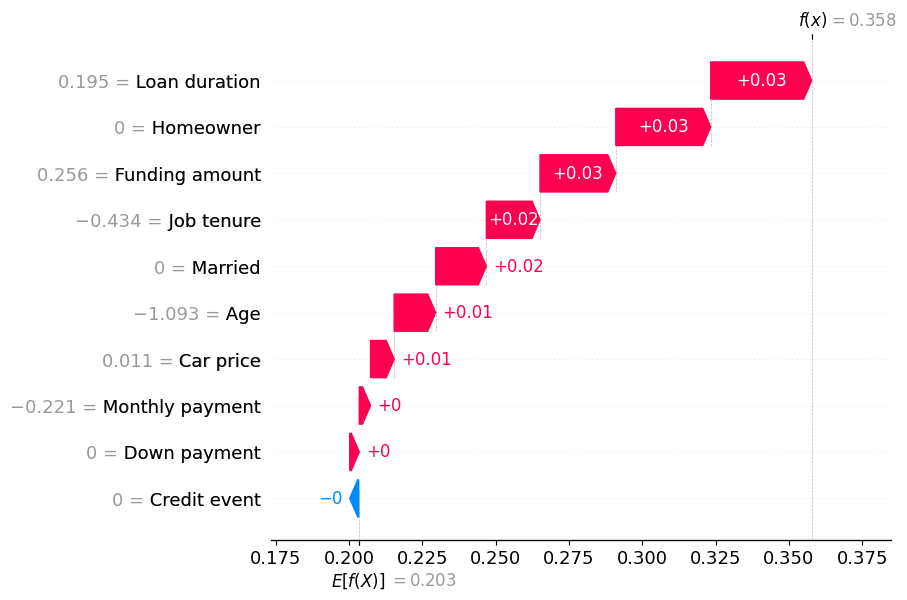

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'data' is your DataFrame with features and target variable
X = data.drop(columns=['Default (y)'])  # Features
y = data['Default (y)']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=93, max_depth=14, min_samples_split=7, min_samples_leaf=6, random_state=42)
model.fit(X_train, y_train)

# Calculate SHAP values using the training dataset
explainer = shap.TreeExplainer(model)
explanation = explainer(X)  # Compute SHAP values for all instances

# Get predictions and create a DataFrame for analysis
predictions = model.predict(X)
predicted_probabilities = model.predict_proba(X)[:, 1]  # Probability of positive class

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'Predictions': predictions,
    'Default (y)': y,
    'Predicted Probability': predicted_probabilities
})

# Identify indices for True Positive, True Negative, False Positive, False Negative
true_positive_indices = predictions_df[(predictions_df['Predictions'] == 1) & (predictions_df['Default (y)'] == 1)].index.tolist()
true_negative_indices = predictions_df[(predictions_df['Predictions'] == 0) & (predictions_df['Default (y)'] == 0)].index.tolist()
false_positive_indices = predictions_df[(predictions_df['Predictions'] == 1) & (predictions_df['Default (y)'] == 0)].index.tolist()
false_negative_indices = predictions_df[(predictions_df['Predictions'] == 0) & (predictions_df['Default (y)'] == 1)].index.tolist()

# Create a list of indices to explain: [True Positive, True Negative, False Positive, False Negative]
ids_to_explain = [
    true_positive_indices[0],   # First True Positive index
    true_negative_indices[0],   # First True Negative index
    false_positive_indices[0],   # First False Positive index
    false_negative_indices[0]    # First False Negative index
]

# Define labels for each type of prediction
labels = ['True Positive', 'True Negative', 'False Positive', 'False Negative']

# Loop over the selected IDs and create waterfall plots
for i in range(len(ids_to_explain)):
    id_to_explain = ids_to_explain[i]
    output_to_explain = 1  # Assuming you want to explain the positive class
    
    
    print(f'SHAP Waterfall Plot - {labels[i]} (Instance Index: {id_to_explain})')
    # Generate the waterfall plot for the current ID
    shap.plots.waterfall(explanation[id_to_explain, :, output_to_explain])
    
   

# Essai de plot les 2 en mm tps (encore un peu le bordel)

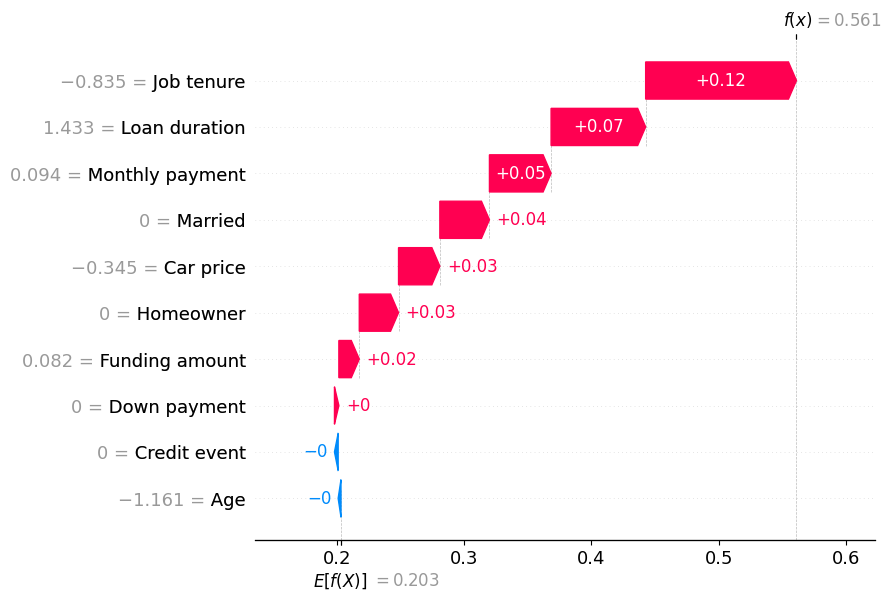

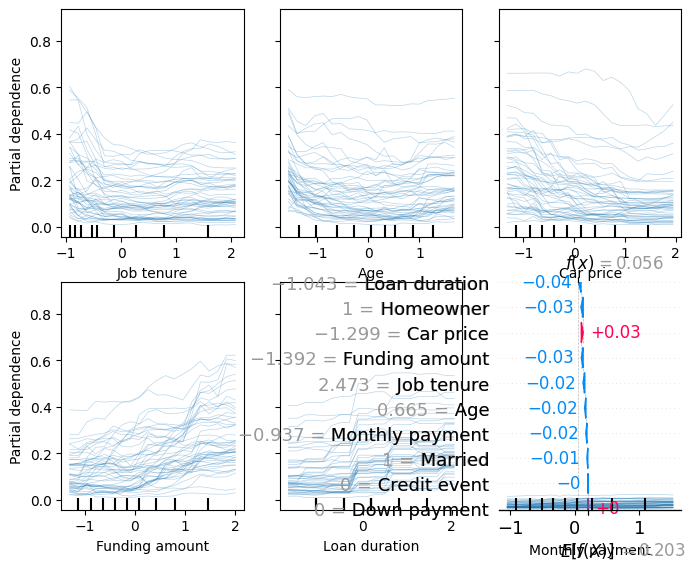

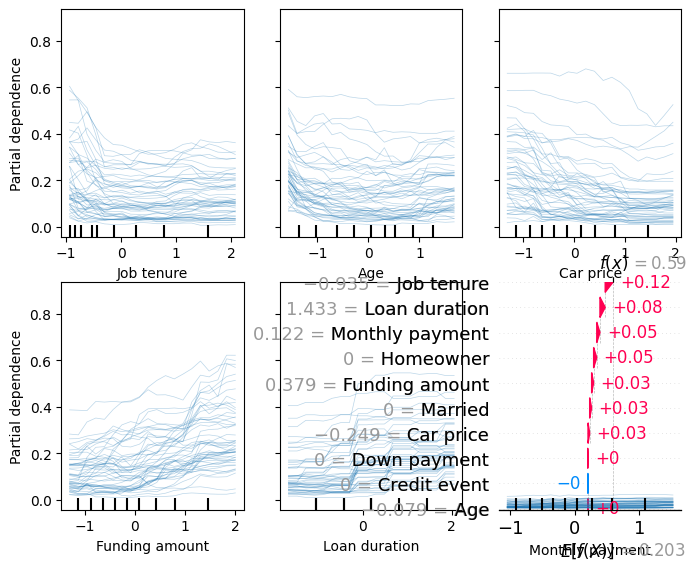

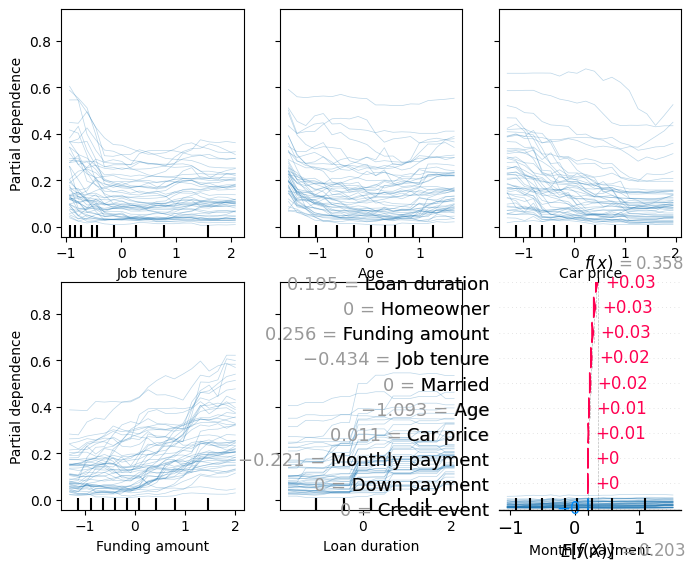

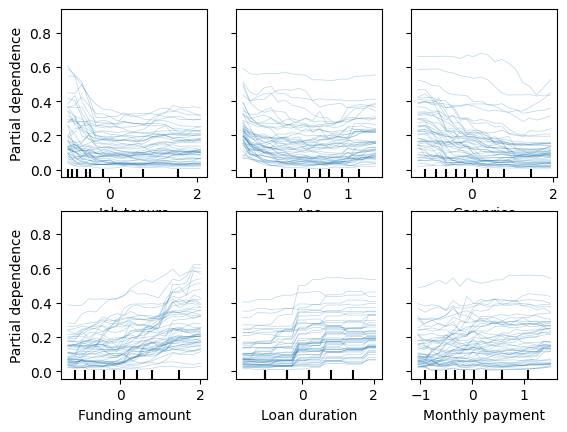

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'data' is your DataFrame with features and target variable
X = data.drop(columns=['Default (y)'])  # Features
y = data['Default (y)']  

continuous_features = ['Job tenure', 'Age', 'Car price', 'Funding amount', 'Loan duration', 'Monthly payment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=93, max_depth=14, min_samples_split=7, min_samples_leaf=6, random_state=42)
model.fit(X_train, y_train)

# Calculate SHAP values using the training dataset
explainer = shap.TreeExplainer(model)
explanation = explainer(X)  # Compute SHAP values for all instances

# Get predictions and create a DataFrame for analysis
predictions = model.predict(X)
predicted_probabilities = model.predict_proba(X)[:, 1]  # Probability of positive class

# Create a DataFrame for predictions
predictions_df = pd.DataFrame({
    'Predictions': predictions,
    'Default (y)': y,
    'Predicted Probability': predicted_probabilities
})

# Identify indices for True Positive, True Negative, False Positive, False Negative
true_positive_indices = predictions_df[(predictions_df['Predictions'] == 1) & (predictions_df['Default (y)'] == 1)].index.tolist()
true_negative_indices = predictions_df[(predictions_df['Predictions'] == 0) & (predictions_df['Default (y)'] == 0)].index.tolist()
false_positive_indices = predictions_df[(predictions_df['Predictions'] == 1) & (predictions_df['Default (y)'] == 0)].index.tolist()
false_negative_indices = predictions_df[(predictions_df['Predictions'] == 0) & (predictions_df['Default (y)'] == 1)].index.tolist()

# Create a list of indices to explain: [True Positive, True Negative, False Positive, False Negative]
ids_to_explain = [
    true_positive_indices[0],   # First True Positive index
    true_negative_indices[0],   # First True Negative index
    false_positive_indices[0],   # First False Positive index
    false_negative_indices[0]    # First False Negative index
]
common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0, 
}

# Define labels for each type of prediction
labels = ['True Positive', 'True Negative', 'False Positive', 'False Negative']

# Loop over the selected IDs to create SHAP plots first
for i in range(len(ids_to_explain)):
    id_to_explain = ids_to_explain[i]
    output_to_explain = 1  # Assuming you want to explain the positive class
    
    
    # Generate the SHAP waterfall plot for the current ID
    shap.plots.waterfall(explanation[id_to_explain, :, output_to_explain])
    n_cols = 3
    n_rows = (len(continuous_features) + n_cols - 1) // n_cols


    display = PartialDependenceDisplay.from_estimator(
        model,
        X_train,
        features=continuous_features,
        kind="individual",
        **common_params)
